# Page Rank Analysis

This notebook demonstrates the page rank calculation algorithm

**Repository:** [https://github.com/bijesh-p/linear-algebra](https://github.com/bijesh-p/linear-algebra/blob/main/pagerank_analysis.ipynb)

**Google Colab:** [Run in Colab](https://colab.research.google.com/github/bijesh-p/linear-algebra/blob/main/pagerank_analysis.ipynb)


In [ ]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

# Set print options
np.set_printoptions(precision=6, suppress=True)

# This is needed to access file from colab
!git clone https://github.com/bijesh-p/linear-algebra.git
%cd  linear-algebra  


[WinError 2] The system cannot find the file specified: './linear-algebra'
c:\Users\bijeshp\Projects\IISc\linear-algebra\linear-algebra



**Algorithm:**
1. **Preprocessing:** Compute out-degrees $c_j = \sum_i g_{ij}$ and identify dangling nodes $D = \{j \mid c_j = 0\}$
2. **Initialize:** $x_j = 1/n$ for all nodes
3. **Iterate until convergence:**
   - Calculate dangling mass: $w = \sum_{j \in D} x_j$
   - Sparse distribution: $y \leftarrow y + \frac{x_j}{c_j} G_j$ for $c_j \neq 0$
   - Add teleportation: $\beta = \frac{1 - p + p \cdot w}{n}$
   - Update: $x_{new} = p \cdot y + \beta \mathbf{1}$
   - Normalize: $x \leftarrow x_{new} / \|x_{new}\|_1$

In [ ]:
def page_rank(G, p, max_iter=100, tol=1e-8):
    """
    Compute PageRank using sparse matrix algorithm.
    
    Parameters:
    -----------
    G : sparse matrix
        Sparse graph matrix where G[i,j] = 1 if there's a link from j to i
    p : float
        Probaility to follow the link (typically 0.85)
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance
        
    Returns:
    --------
    x : ndarray
        PageRank vector
    """
    n = G.shape[0]
    
    # Preprocessing: Compute out-degrees
    c = np.array(G.sum(axis=0)).flatten()
    D = c == 0
    dangling_nodes = np.where(D)[0]
    
    print(f"Graph: {n} nodes, {len(dangling_nodes)} dangling nodes")
    
    # Initialize
    x = np.ones(n) / n
    
    # Iteration
    for iteration in range(max_iter):
        x_old = x.copy()
        w = np.sum(x[D])
        
        y = np.zeros(n)
        for j in range(n):
            if c[j] != 0:
                col_j = G[:, j].toarray().flatten()
                y += (x[j] / c[j]) * col_j
        
        beta = (1 - p + p * w) / n
        x_new = p * y + beta * np.ones(n)
        # Normalize
        x = x_new / np.sum(x_new)
        
        # Check convergence
        diff = np.linalg.norm(x - x_old, ord=1)
        
        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}: ||x_new - x_old||_1 = {diff:.10f}")
        
        if diff < tol:
            print(f"Converged after {iteration + 1} iterations (error: {diff:.2e})")
            break
    
    return x

## Load Data

In [ ]:
# Load Indian Tourism network data
mat = scipy.io.loadmat('IndianTourism.mat')
U = mat['U']  # URLs
G = mat['G']  # Sparse graph matrix

print(f"Matrix shape: {G.shape}")
print(f"Non-zero entries: {G.nnz}")

Matrix shape: (500, 500)
Non-zero entries: 3926


## Visualize Graph Structure

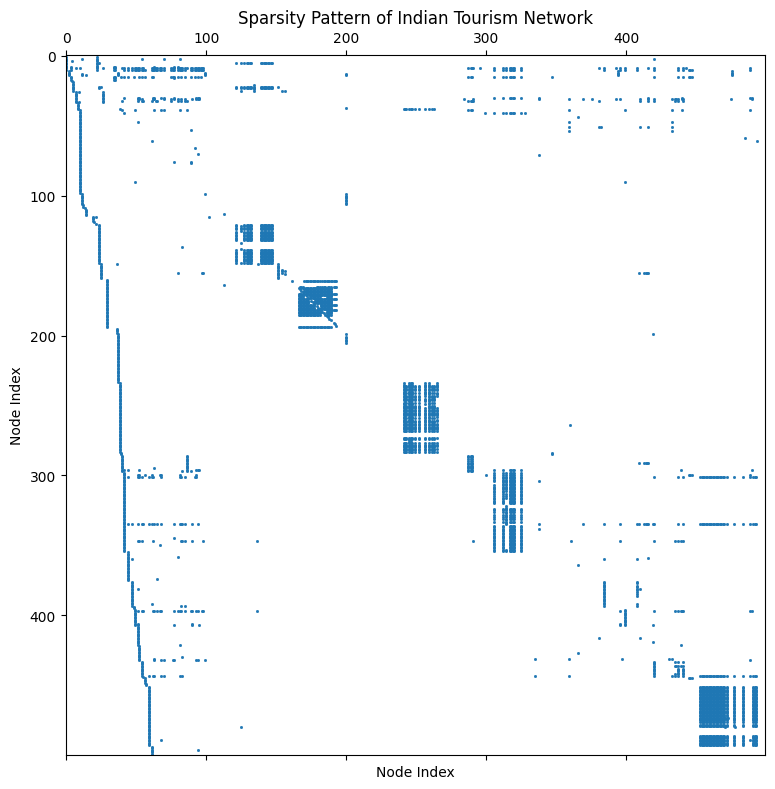

In [ ]:
plt.figure(figsize=(8, 8))
plt.spy(G, markersize=1)
plt.title('Sparsity Pattern of Indian Tourism Network')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.tight_layout()
plt.show()

## Compute PageRank

Using  $p = 0.85$

In [ ]:
p = 0.85
x = page_rank(G, p)

Graph: 500 nodes, 277 dangling nodes
Iteration 10: ||x_new - x_old||_1 = 0.0090910476
Iteration 10: ||x_new - x_old||_1 = 0.0090910476
Iteration 20: ||x_new - x_old||_1 = 0.0012574393
Iteration 20: ||x_new - x_old||_1 = 0.0012574393
Iteration 30: ||x_new - x_old||_1 = 0.0001893645
Iteration 30: ||x_new - x_old||_1 = 0.0001893645
Iteration 40: ||x_new - x_old||_1 = 0.0000283411
Iteration 40: ||x_new - x_old||_1 = 0.0000283411
Iteration 50: ||x_new - x_old||_1 = 0.0000042340
Iteration 50: ||x_new - x_old||_1 = 0.0000042340
Iteration 60: ||x_new - x_old||_1 = 0.0000006322
Iteration 60: ||x_new - x_old||_1 = 0.0000006322
Iteration 70: ||x_new - x_old||_1 = 0.0000000944
Iteration 70: ||x_new - x_old||_1 = 0.0000000944
Iteration 80: ||x_new - x_old||_1 = 0.0000000141
Converged after 82 iterations (error: 9.63e-09)
Iteration 80: ||x_new - x_old||_1 = 0.0000000141
Converged after 82 iterations (error: 9.63e-09)


## Top Ranked Pages

In [ ]:
# Get top 10 ranked pages
top_indices = np.argsort(x)[::-1][:10]

print(f"{'Rank':<6} {'Index':<8} {'PageRank':<12} {'URL'}")
print("-" * 70)

for i, idx in enumerate(top_indices):
    rank = i + 1
    pagerank_val = f"{x[idx]:.6f}"
    url = U.flatten()[idx][0]
    print(f"{rank:<6} {idx:<8} {pagerank_val:<12} {url}")

Rank   Index    PageRank     URL
----------------------------------------------------------------------
1      431      0.057644     http://www.makeinindia.com
2      161      0.035303     http://subscribe.businessworld.in
3      300      0.020900     http://analytics.wrc.nic.in/cmfanalytics
4      9        0.018004     http://www.nic.in
5      473      0.017526     http://foodprocessingindia.gov.in
6      31       0.013467     http://india.gov.in
7      26       0.009677     http://nkn.gov.in/en
8      33       0.009677     http://recruitment.nic.in
9      10       0.008479     http://cmf.gov.in
10     15       0.007448     http://drupal.org)


## Bar Graph of PageRank Values

Shows entries of PageRank vector $x$ for all nodes (top 10 highlighted)

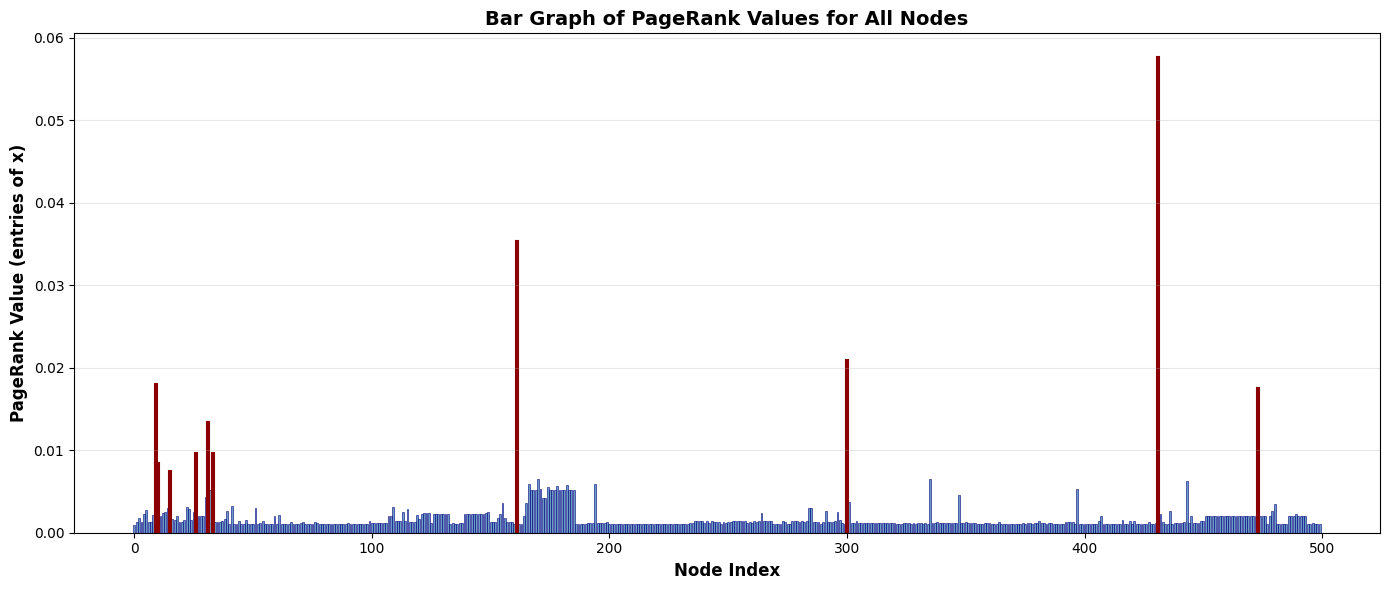

In [ ]:
plt.figure(figsize=(14, 6))

# Bar graph of all PageRank values
plt.bar(range(len(x)), x, color='steelblue', edgecolor='navy', linewidth=0.5, alpha=0.8)

# Highlight top 10 nodes
for idx in top_indices[:10]:
    plt.bar(idx, x[idx], color='coral', edgecolor='darkred', linewidth=1.5)

plt.xlabel('Node Index', fontsize=12, fontweight='bold')
plt.ylabel('PageRank Value (entries of x)', fontsize=12, fontweight='bold')
plt.title('Bar Graph of PageRank Values for All Nodes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Observations

1. makeinindia.com has highest PageRank (0.057644)
2. 98.43% sparse, 277 dangling nodes (55.4%)
3. Most site has low ranks